In [ ]:
!pip install autotrain-advanced
!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 26

In [ ]:
!autotrain setup --update-torch

> INFO    Installing latest transformers@main
> INFO    Successfully installed latest transformers
> INFO    Installing latest peft@main
> INFO    Successfully installed latest peft
> INFO    Installing latest diffusers@main
> INFO    Successfully installed latest diffusers
> INFO    Installing latest trl@main
> INFO    Successfully installed latest trl
> INFO    Installing latest xformers
> INFO    Successfully installed latest xformers
> INFO    Installing latest PyTorch
> INFO    Successfully installed latest PyTorch


In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModelForCausalLM

https://discuss.huggingface.co/t/difference-between-causallm-and-lmheadmodel/17135

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
 input_query = """write a short introduction about the term "biopsy"
"""

In [ ]:
input_query2 = """### Human: write a short introduction about the term "biopsy".
Explain it to a 10 year old.
  ### Assistant:
"""

### Fine tuning GPT

In [ ]:
pretrained_tokenizer = AutoTokenizer.from_pretrained("gpt2")
pretrained_model = AutoModelWithLMHead.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1499: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [ ]:
encoded_inp = pretrained_tokenizer.encode(input_query, return_tensors="pt")
output = pretrained_model.generate(encoded_inp)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


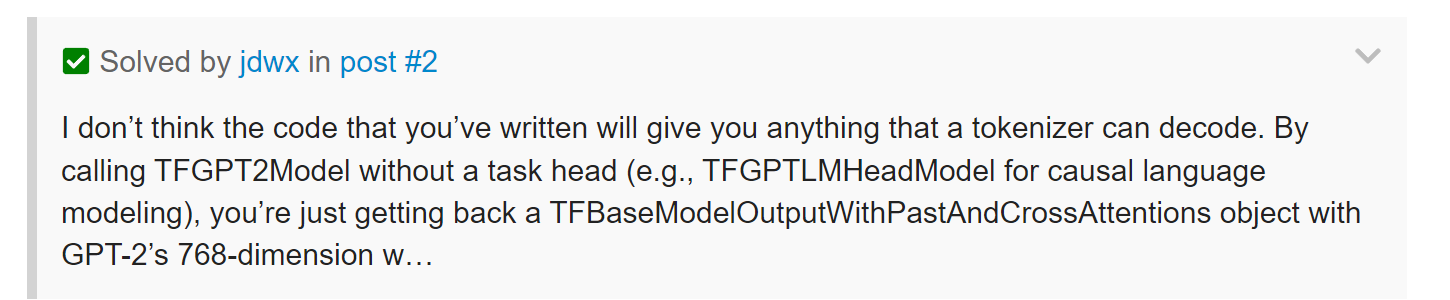

In [ ]:
pretrained_tokenizer.decode(output[0])

'write a short introduction about the term "biopsy"\n\nThe term "biopsy" is'

lgaalves/gpt2-dolly

In [ ]:
!autotrain --help

usage: autotrain <command> [<args>]

positional arguments:
  {app,llm,setup,dreambooth,api,text-classification,image-classification,tabular,spacerunner}
    commands

options:
  -h, --help
    show this
    help
    message and
    exit
  --version, -v
    Display
    AutoTrain
    version

For more
information
about a
command,
run:
`autotrain
<command>
--help`


In [ ]:
!autotrain llm --help

usage: autotrain <command> [<args>] llm
       [-h]
       [--train]
       [--deploy]
       [--inference]
       [--data_path DATA_PATH]
       [--train_split TRAIN_SPLIT]
       [--valid_split VALID_SPLIT]
       [--text_column TEXT_COLUMN]
       [--rejected_text_column REJECTED_TEXT_COLUMN]
       [--model MODEL]
       [--learning_rate LEARNING_RATE]
       [--num_train_epochs NUM_TRAIN_EPOCHS]
       [--train_batch_size TRAIN_BATCH_SIZE]
       [--warmup_ratio WARMUP_RATIO]
       [--gradient_accumulation_steps GRADIENT_ACCUMULATION_STEPS]
       [--optimizer OPTIMIZER]
       [--scheduler SCHEDULER]
       [--weight_decay WEIGHT_DECAY]
       [--max_grad_norm MAX_GRAD_NORM]
       [--seed SEED]
       [--add_eos_token]
       [--block_size BLOCK_SIZE]
       [--use_peft]
       [--lora_r LORA_R]
       [--lora_alpha LORA_ALPHA]
       [--lora_dropout LORA_DROPOUT]
       [--logging_steps LOGGING_STEPS]
       [--project_name PROJECT_NAME]
       [--evaluation_strategy EVALUATIO

In [ ]:
!autotrain llm \
  --train \
  --project_name my_demo_project \
  --model gpt2 \
  --data_path timdettmers/openassistant-guanaco \
  --use_peft \
  --use_int4 \
  --learning_rate 2e-4 \
  --train_batch_size 2 \
  --num_train_epochs 2 \
  --trainer sft \
  --model_max_length 1024

#--push_to_hub --repo_id your_repo_id -

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.0.1+cu118)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
> INFO    Running LLM
> INFO    Params: Namespace(version=False, train=True, deploy=False, inference=False, data_path='timdettmers/openassistant-guanaco', train_split='train', valid_split=None, text_column='text', rejected_text_column='rejected', model='gpt2', learning_rate=0.0002, num_train_epochs=2, train_batch_size=2, warmup_ratio=0.1, gradient_accumulation_steps=1, optimizer='adamw_torch', scheduler='linear', weight_decay=0.0, max_grad_norm=1.0, seed=42, add_eos_token=False, block_size=-1, use_peft=True, lora_r=16, lora_alpha=32, lora_dropout=0.05, logging_steps=-1, project_name='my_d

In [ ]:
finetuned_tokenizer = AutoTokenizer.from_pretrained("./my_demo_project")
finetuned_model = AutoModelWithLMHead.from_pretrained("./my_demo_project")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1499: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/tuners/lora/model.py:311: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [ ]:
encoded_inp = finetuned_tokenizer.encode(input_query2, return_tensors="pt")
output = finetuned_model.generate(encoded_inp)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 30, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


In [ ]:
finetuned_tokenizer.decode(output[0])

'### Human: write a short introduction about the term "biopsy".\nExplain it to a 10 year old.\n  ### Assistant:\n\n'

### Fine tuning Llama2

In [ ]:
!autotrain llm \
  --train \
  --project_name my_llama \
  --model TinyPixel/Llama-2-7B-bf16-sharded \
  --data_path timdettmers/openassistant-guanaco \
  --use_peft \
  --use_int4 \
  --learning_rate 2e-4 \
  --train_batch_size 2 \
  --num_train_epochs 2 \
  --trainer sft \
  --model_max_length 2048

#--push_to_hub --repo_id your_repo_id -

> INFO    Running LLM
> INFO    Params: Namespace(version=False, train=True, deploy=False, inference=False, data_path='timdettmers/openassistant-guanaco', train_split='train', valid_split=None, text_column='text', rejected_text_column='rejected', model='TinyPixel/Llama-2-7B-bf16-sharded', learning_rate=0.0002, num_train_epochs=2, train_batch_size=2, warmup_ratio=0.1, gradient_accumulation_steps=1, optimizer='adamw_torch', scheduler='linear', weight_decay=0.0, max_grad_norm=1.0, seed=42, add_eos_token=False, block_size=-1, use_peft=True, lora_r=16, lora_alpha=32, lora_dropout=0.05, logging_steps=-1, project_name='my_llama', evaluation_strategy='epoch', save_total_limit=1, save_strategy='epoch', auto_find_batch_size=False, fp16=False, push_to_hub=False, use_int8=False, model_max_length=2048, repo_id=None, use_int4=True, trainer='sft', target_modules=None, merge_adapter=False, token=None, backend='default', username=None, use_flash_attention_2=False, disable_gradient_checkpointing=False, 

In [ ]:
ds2 = load_dataset("timdettmers/openassistant-guanaco")

Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
ds2["train"][0]

{'text': '### Human: Can you write a short introduction about the relevance of the term "monopsony" in economics? Please use examples related to potential monopsonies in the labour market and cite relevant research.### Assistant: "Monopsony" refers to a market structure where there is only one buyer for a particular good or service. In economics, this term is particularly relevant in the labor market, where a monopsony employer has significant power over the wages and working conditions of their employees. The presence of a monopsony can result in lower wages and reduced employment opportunities for workers, as the employer has little incentive to increase wages or provide better working conditions.\n\nRecent research has identified potential monopsonies in industries such as retail and fast food, where a few large companies control a significant portion of the market (Bivens & Mishel, 2013). In these industries, workers often face low wages, limited benefits, and reduced bargaining po